In [132]:
# Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split, KFold, cross_validate
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
from sklearn.model_selection import StratifiedKFold, KFold, StratifiedShuffleSplit
from sklearn.utils import shuffle

# Helper file
import helper_data_generator

# Models
from PEA import PerformanceEnrichmentAnalysisClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.dummy import DummyClassifier

# Metric
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, precision_score, \
recall_score, SCORERS, roc_auc_score, roc_curve, auc, precision_recall_curve

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
%matplotlib inline

In [4]:
# PEA

df = pd.read_csv('../../data/pea_data_2018-08-28_cleaned.csv', sep=';', decimal=',')

X_full = df.loc[:, ['order_weight_aim',
                'width',
                'thickness',
                'piece_weight_aim',
                "productionsteps"]].reset_index(drop=True)
y_full = df.loc[:,'lateness']

borders = [-2880, 2880]

(y_full_encoded_values, Y_full_encoded_class_labels) =  helper_data_generator.encode_target_features_to_categorical(y_full, borders)

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full_encoded_values, test_size=0.1, stratify=y_full_encoded_values)

In [54]:
classifier_list = [
     PerformanceEnrichmentAnalysisClassifier(
        number_of_clusters=20, permutations=100),
     KNeighborsClassifier(3),
     DummyClassifier(strategy='uniform'),
     DummyClassifier(strategy='most_frequent'),
     # SVC(kernel="linear", C=0.025),
     # SVC(gamma=2, C=1),
     # DecisionTreeClassifier(max_depth=5),
     # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
     # MLPClassifier(alpha=0.01),
     AdaBoostClassifier(),
     #GaussianNB(),
     # QuadraticDiscriminantAnalysis()
]

In [6]:
clf = classifier_list[0]
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
# Sometimes 2*2 and sometimes 3*3 because of huge class imbalance in label=0
display(confusion_matrix(y_test, prediction))

tp_A = confusion_matrix(y_test, prediction)[0][0]
print('tp_A: ', tp_A)
tp_B = confusion_matrix(y_test, prediction)[1][1]
print('tp_B: ', tp_B)
tp_C = confusion_matrix(y_test, prediction)[2][2]
print('tp_C: ',tp_C)
tn_A = confusion_matrix(y_test, prediction)[2][2]+confusion_matrix(y_test, prediction)[2][1]+confusion_matrix(y_test, prediction)[1][1]+confusion_matrix(y_test, prediction)[1][2]
print('tn_A: ',tn_A)
tn_B = confusion_matrix(y_test, prediction)[2][2]+confusion_matrix(y_test, prediction)[0][0]+confusion_matrix(y_test, prediction)[0][2]+confusion_matrix(y_test, prediction)[2][0]
print('tn_B: ',tn_B)
tn_C = confusion_matrix(y_test, prediction)[0][0]+confusion_matrix(y_test, prediction)[0][1]+confusion_matrix(y_test, prediction)[1][1]+confusion_matrix(y_test, prediction)[1][0]
print('tn_C: ',tn_C)
fn_A = confusion_matrix(y_test, prediction)[0][1]+confusion_matrix(y_test, prediction)[0][2]
print('fn_A: ',fn_A)
fn_B = confusion_matrix(y_test, prediction)[1][0]+confusion_matrix(y_test, prediction)[1][2]
print('fn_B: ',fn_B)
fn_C = confusion_matrix(y_test, prediction)[2][0]+confusion_matrix(y_test, prediction)[2][1]
print('fn_C: ',fn_C)
fp_A = confusion_matrix(y_test, prediction)[2][0]+confusion_matrix(y_test, prediction)[1][0]
print('fp_A: ',fp_A)
fp_B = confusion_matrix(y_test, prediction)[0][1]+confusion_matrix(y_test, prediction)[2][1]
print('fp_B: ',fp_B)
fp_C = confusion_matrix(y_test, prediction)[0][2]+confusion_matrix(y_test, prediction)[1][2]
print('fp_C: ',fp_C)


sensitivity_recall_tpr_class_A = tp_A/(tp_A+fn_A)
print('sensitivity_recall_tpr_class_A: ',sensitivity_recall_tpr_class_A)
sensitivity_recall_tpr_class_B = tp_B/(tp_B+fn_B)
print('sensitivity_recall_tpr_class_B: ',sensitivity_recall_tpr_class_B)
sensitivity_recall_tpr_class_C = tp_C/(tp_C+fn_C)
print('sensitivity_recall_tpr_class_C: ',sensitivity_recall_tpr_class_C)

speificity_neg_recall_tnr_class_A = tn_A/(tn_A+fp_A)
print('speificity_neg_recall_tnr_class_A: ',speificity_neg_recall_tnr_class_A)
speificity_neg_recall_tnr_class_B = tn_B/(tn_B+fp_B)
print('speificity_neg_recall_tnr_class_B: ',speificity_neg_recall_tnr_class_B)
speificity_neg_recall_tnr_class_C = tn_C/(tn_C+fp_C)
print('speificity_neg_recall_tnr_class_C: ',speificity_neg_recall_tnr_class_C)

fpr_class_A = fp_A/(tn_A+fp_A)
print('fpr_class_A: ',fpr_class_A)
fpr_class_B = fp_B/(tn_B+fp_B)
print('fpr_class_B: ',fpr_class_B)
fpr_class_C = fp_C/(tn_C+fp_C)
print('fpr_class_C: ',fpr_class_C)

fnr_class_A = fn_A/(tp_A+fn_A)
print('fnr_class_A: ',fnr_class_A)
fnr_class_B = fn_B/(tp_B+fn_B)
print('fnr_class_B: ',fnr_class_B)
fnr_class_C = fn_C/(tp_C+fn_C)
print('fnr_class_C: ',fnr_class_C)

array([[136,  81, 289],
       [  0,   0,   2],
       [ 56,  46, 169]])

tp_A:  136
tp_B:  0
tp_C:  169
tn_A:  217
tn_B:  650
tn_C:  217
fn_A:  370
fn_B:  2
fn_C:  102
fp_A:  56
fp_B:  127
fp_C:  291
sensitivity_recall_tpr_class_A:  0.26877470355731226
sensitivity_recall_tpr_class_B:  0.0
sensitivity_recall_tpr_class_C:  0.6236162361623616
speificity_neg_recall_tnr_class_A:  0.7948717948717948
speificity_neg_recall_tnr_class_B:  0.8365508365508365
speificity_neg_recall_tnr_class_C:  0.4271653543307087
fpr_class_A:  0.20512820512820512
fpr_class_B:  0.16344916344916344
fpr_class_C:  0.5728346456692913
fnr_class_A:  0.7312252964426877
fnr_class_B:  1.0
fnr_class_C:  0.3763837638376384


In [7]:
mcm = multilabel_confusion_matrix(y_test, prediction, labels=[-1,0,1])
display(mcm) 

tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]

# Out of actual +ve samples, how many of them have been correctly predicted as +ve
sensitivity_recall_tpr = tp / (tp + fn) #sensitivity/recall/tpr/hitrate for each class
print('sensitivity_recall_tpr: ', sensitivity_recall_tpr)

# Out of actual -ve samples, how many of them have been correctly predicted as -ve
speificity_neg_recall_tnr = tn / (tn + fp) #specificity/tnr/inverse_recall for each class
print('speificity_neg_recall_tnr: ',speificity_neg_recall_tnr)

# proportion of -ve samples that were incorrectly classified
fpr = fp / (tn + fp) #fpr for each class
print('fpr: ',fpr)

# proportion of +ve samples that were incorrectly classified
fnr = fn / (tp + fn) #fnr for each class
print('fnr: ',fnr)

array([[[217,  56],
        [370, 136]],

       [[650, 127],
        [  2,   0]],

       [[217, 291],
        [102, 169]]])

sensitivity_recall_tpr:  [0.2687747  0.         0.62361624]
speificity_neg_recall_tnr:  [0.79487179 0.83655084 0.42716535]
fpr:  [0.20512821 0.16344916 0.57283465]
fnr:  [0.7312253  1.         0.37638376]


In [8]:
clf = classifier_list[0]
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
y_test = label_binarize(y_test, classes=[-1,0,1])
n_classes = y_test.shape[1]
# display(n_classes)
prediction = label_binarize(prediction, classes=[-1,0,1])
# display(pd.DataFrame(prediction))
display(roc_auc_score(y_test, prediction, multi_class='ovr', average='weighted', labels=[-1,0,1]))

0.510717442804057

3

0.5492677500551517

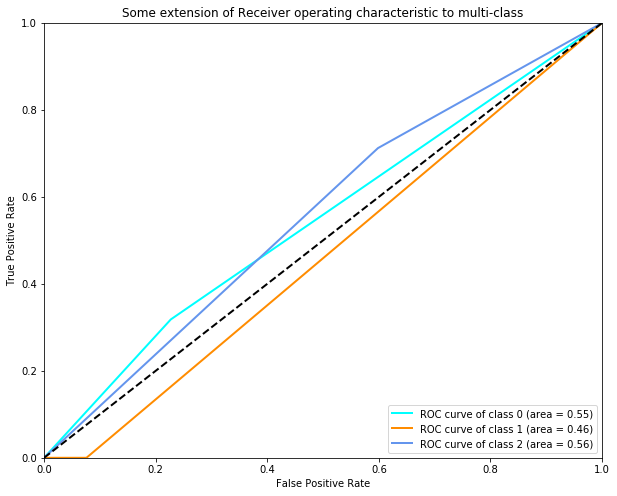

In [45]:
clf = classifier_list[0]
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
y_test = label_binarize(y_test, classes=[-1,0,1])
n_classes = y_test.shape[1]
display(n_classes)
prediction = label_binarize(prediction, classes=[-1,0,1])
display(roc_auc_score(y_test, prediction, multi_class='ovr', average='weighted', labels=[-1,0,1]))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10,8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [9]:
def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
        for rect in ax.patches:
            # Get X and Y placement of label from rect.
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2

            # Number of points between bar and label. Change to your liking.
            space = spacing
            # Vertical alignment for positive values
            va = 'bottom'

            # If value of bar is negative: Place label below bar
            if y_value < 0:
                # Invert space to place label below
                space *= -1
                # Vertically align label at top
                va = 'top'

            # Use Y value as label and format number with one decimal place
            label = "{:.3f}".format(y_value)

            # Create annotation
            ax.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(0, space),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='center',                # Horizontally center label
                va=va,
                fontsize=8)                      # Vertically align label differently for
                                            # positive and negative values.


In [10]:
def noise_roc_auc(clf, folds):
    
    list_of_auc = []
    list_values = list(np.round(np.arange(0, 1, 0.2),2))
    
    for noise in list_values:
        list_temp = []
        X, y = helper_data_generator.make_classification(n_samples=5000,
                                       n_features=26,
                                       n_informative=21,
                                       n_redundant=5,
                                       n_repeated=0,
                                       n_classes=3,
                                       n_clusters_per_class=1,
                                       class_sep=0.7,
                                       flip_y=noise,
                                       weights=[0.65, 0.11, 0.24])
        
        column_size = X.shape[1]
        cols = [x + str(i) for x, i in zip(["col"]*column_size,
                                               range(column_size))]

        y = pd.DataFrame(y, columns=['label'])
        y.index = np.arange(0, len(y))
        y.index.name = 'index'

        syn_df = pd.DataFrame(X, columns=cols)
        syn_df.index = np.arange(0, len(syn_df))
        syn_df.index.name = 'index'
        syn_df = syn_df.merge(y, on='index')
        #display(syn_df.iloc[:,:26])
        #display(syn_df.iloc[:,27:])
      
        rkf = KFold(n_splits=folds)
        for train, test in rkf.split(syn_df):
            syn_df_train = syn_df.loc[train]
            syn_df_test = syn_df.loc[test]
            X_train = syn_df_train.loc[:, cols].reset_index(drop=True)
            y_train = syn_df_train.loc[:, 'label'].reset_index(drop=True)
            X_test = syn_df_test.loc[:, cols].reset_index(drop=True)
            y_test = syn_df_test.loc[:, 'label'].reset_index(drop=True)
            X_train, y_train = shuffle(X_train, y_train)
            clf.fit(X_train, y_train)
            prediction = clf.predict(X_test)
            y_test = label_binarize(y_test, classes=[0,1,2])
            prediction = label_binarize(prediction, classes=[0,1,2])
            list_temp.append(roc_auc_score(y_test, prediction, multi_class='ovr', average='weighted', labels=[0,1,2]))
        
        list_of_auc.append(np.mean(list_temp))
    
    return np.round(list_of_auc,3)

def noise(clf, metric, folds):
    
    list_of_acc = []
    
    list_values = list(np.round(np.arange(0, 1, 0.2),2))
    
    for noise in list_values:
    
        X_train, X_test, y_train, y_test = helper_data_generator.get_make_classification_data(number_of_samples=5000,
                                    number_of_features=26,
                                    number_informative_features=5,
                                    number_redundant_features=21,
                                    number_repeated_features=0,
                                    number_classes=3,
                                    number_clusters_per_class=1,
                                    class_separator=0.9,
                                    flip_y=noise,
                                    weights=[0.65, 0.11, 0.24])

        cv = StratifiedShuffleSplit(n_splits=folds, test_size=0.1)
        scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring=metric)
        list_of_acc.append(np.mean(scores))

    return np.round(list_of_acc,3)

def create_dataframe(dict_items, metric):
    
    list_lists_clf = []

    for i in range(5):
        list_lists_clf.append('list'+str(i))

    for i in range(5):
        list_lists_clf[i] = []

    for i in range(5):
        for key, value in dict_items.items():
            #print(key, value)
            list_lists_clf[i].append((key,value[i]))
        #print(len(value))
        #print(np.array(dict_items['SVC'].T).reshape(-1,1))

    #print(list_lists_clf)

    list_lists_clf = np.array(list_lists_clf)
    a = list_lists_clf.T[0].reshape(1,-1)
    a = a[0]

    _, idx = np.unique(a, return_index=True)
    x = a[np.sort(idx)]

    list_noise_vals = list(np.round(np.arange(0, 1, 0.2),2))
    list_noise_vals = np.array(list_noise_vals)

    y = list_lists_clf.T[1]

    col_noise = []
    for i in list_noise_vals:
        col_noise.append(('noise_'+str(i)))
        
    plot_bar(x, y, col_noise, metric)
    
def create_dict_clf_noise(classifier_list, metric, folds):
    
    list_lists_clf = []
    list_lists_clf_metric = []

    for i in range(len(classifier_list)):
        list_lists_clf.append('list'+str(i))

    for i in range(len(list_lists_clf)):
        list_lists_clf[i] = []
    
    if metric=='roc_auc':
        for i in range(len(classifier_list)):
            if isinstance(classifier_list[i],PerformanceEnrichmentAnalysisClassifier):
                name = 'PEA'
                list_lists_clf_metric.append((name,noise_roc_auc(classifier_list[i], folds)))
            elif isinstance(classifier_list[i],DummyClassifier):
                if classifier_list[i].strategy=='uniform':
                    display(classifier_list[i])
                    list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0]+'_uniform',noise_roc_auc(classifier_list[i], folds)))
                elif classifier_list[i].strategy=='most_frequent':
                    display(classifier_list[i])
                    list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0]+'_most_frequent',noise_roc_auc(classifier_list[i], folds)))
            else:
                list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0],noise_roc_auc(classifier_list[i], folds)))
        
    else:
        for i in range(len(classifier_list)):
            if isinstance(classifier_list[i],PerformanceEnrichmentAnalysisClassifier):
                name = 'PEA'
                list_lists_clf_metric.append((name,noise(classifier_list[i], metric, folds)))
            elif isinstance(classifier_list[i],DummyClassifier):
                if classifier_list[i].strategy=='uniform':
                    display(classifier_list[i])
                    list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0]+'_uniform',noise(classifier_list[i], metric, folds)))
                elif classifier_list[i].strategy=='most_frequent':
                    display(classifier_list[i])
                    list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0]+'_most_frequent',noise(classifier_list[i], metric, folds)))
            else:
                list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0],noise(classifier_list[i], metric, folds)))

    dict_items= {}

    for i in range(np.array(list_lists_clf_metric).shape[0]):
        dict_items[np.unique(np.array(list_lists_clf_metric).T[0][i])[0]] = np.hstack((np.array(list_lists_clf_metric).T[1][i]))

    create_dataframe(dict_items, metric)
    
def plot_bar(x, y, col_noise, metric):
    # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    # https://blog.finxter.com/matplotlib-legend/

    df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
    display(df_1)
    ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
    ax.set_yticks(np.arange(0,1.1,0.1))
    ax.set_ylim(0,2)
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
    #ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
    ax.set_facecolor('white')
    ax.set_ylabel(str(metric),fontsize=18)
    ax.set_title('Noise vs '+str(metric),fontsize=18)
    
    
    # facecolor='grey',
    ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),3)[0]) +'& SD = '+str(round(df_1.std(),3)[0]),
               'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),3)[1]) +'& SD = '+str(round(df_1.std(),3)[1]),
               'DummyClassifier-Uniform: Mean = '+ str(round(df_1.mean(),3)[2]) +'& SD = '+str(round(df_1.std(),3)[2]),
               'DummyClassifier-MostFrequent: Mean = '+ str(round(df_1.mean(),3)[3]) +'& SD = '+str(round(df_1.std(),3)[3]),
               'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),3)[4]) +'& SD = '+str(round(df_1.std(),3)[4])],
               fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title= str(metric)+' - Central Tendency', title_fontsize=14, borderpad=.9)

    # legend = ax.legend()
    # frame = legend.get_frame()
    # frame.set_color('grey')

    labels = list(round(df_1.std(),3))
    add_value_labels(ax)

In [52]:
def noise_classwise(clf, metric, class_label, folds):
    
    list_of_class_sensitivity = []
    list_values = list(np.round(np.arange(0, 1, 0.2),2))
    
    for noise in list_values:
        list_temp_A = []
        list_temp_B = []
        list_temp_C = []
        X, y = helper_data_generator.make_classification(n_samples=5000,
                                       n_features=26,
                                       n_informative=21,
                                       n_redundant=5,
                                       n_repeated=0,
                                       n_classes=3,
                                       n_clusters_per_class=1,
                                       class_sep=0.9,
                                       flip_y=noise,
                                       weights=[0.65, 0.01, 0.34])
        
#         column_size = X.shape[1]
#         cols = [x + str(i) for x, i in zip(["col"]*column_size,
#                                                range(column_size))]

#         y = pd.DataFrame(y, columns=['label'])
#         y.index = np.arange(0, len(y))
#         y.index.name = 'index'

#         syn_df = pd.DataFrame(X, columns=cols)
#         syn_df.index = np.arange(0, len(syn_df))
#         syn_df.index.name = 'index'
#         syn_df = syn_df.merge(y, on='index')
        #display(syn_df)

        #skf = StratifiedKFold(n_splits=folds, shuffle=True)
        skf = StratifiedShuffleSplit(n_splits=folds, test_size=0.2)
        for train_index, test_index in skf.split(X, y):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            #display(len(np.unique(y_test)))
            n_classes = len(np.unique(y_test))
#         rkf = KFold(n_splits=folds)
#         for train, test in rkf.split(syn_df):
#             syn_df_train = syn_df.loc[train]
#             syn_df_test = syn_df.loc[test]
#             X_train = syn_df_train.loc[:, cols].reset_index(drop=True)
#             y_train = syn_df_train.loc[:, 'label'].reset_index(drop=True)
#             X_test = syn_df_test.loc[:, cols].reset_index(drop=True)
#             y_test = syn_df_test.loc[:, 'label'].reset_index(drop=True)
#             X_train, y_train = shuffle(X_train, y_train)
            #print(clf)
            clf.fit(X_train, y_train)
            prediction = clf.predict(X_test)
            
            if metric=='roc_auc_metric':
                y_test = label_binarize(y_test, classes=[0,1,2])
                prediction = label_binarize(prediction, classes=[0,1,2])
                fpr = dict()
                tpr = dict()
                roc_auc = dict()
                # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], prediction[:, i])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                #print('roc_auc_class: ',roc_auc)

                list_temp_A.append(roc_auc[0])
                list_temp_B.append(roc_auc[1])
                list_temp_C.append(roc_auc[2])
            elif metric=='precision_recall':
                y_test = label_binarize(y_test, classes=[0,1,2])
                prediction = label_binarize(prediction, classes=[0,1,2])
                precision = dict()
                recall = dict()
                pr_auc = dict()
                # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
                for i in range(n_classes):
                    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], prediction[:, i])
                    pr_auc[i] = auc(recall[i], precision[i])
                #print('roc_auc_class: ',roc_auc)

                list_temp_A.append(pr_auc[0])
                list_temp_B.append(pr_auc[1])
                list_temp_C.append(pr_auc[2])
            else:
                mcm = multilabel_confusion_matrix(y_test, prediction, labels=[0,1,2])
                tn = mcm[:, 0, 0]
                tp = mcm[:, 1, 1]
                fn = mcm[:, 1, 0]
                fp = mcm[:, 0, 1]
                if metric=='fnr':
                    fnr_class_A = (fn / (fn + tp))[0]
                    fnr_class_B = (fn / (fn + tp))[1]
                    fnr_class_C = (fn / (fn + tp))[2]
                    list_temp_A.append(fnr_class_A)
                    list_temp_B.append(fnr_class_B)
                    list_temp_C.append(fnr_class_C)
                elif metric=='fpr':
                    fpr_class_A = (fp / (tn + fp))[0]
                    fpr_class_B = (fp / (tn + fp))[1]
                    fpr_class_C = (fp / (tn + fp))[2]
                    list_temp_A.append(fpr_class_A)
                    list_temp_B.append(fpr_class_B)
                    list_temp_C.append(fpr_class_C)
                elif metric=='sensitivity':
                    sensitivity_recall_tpr_class_A = (tp / (tp + fn))[0]
                    sensitivity_recall_tpr_class_B = (tp / (tp + fn))[1]
                    sensitivity_recall_tpr_class_C = (tp / (tp + fn))[2]
                    list_temp_A.append(sensitivity_recall_tpr_class_A)
                    list_temp_B.append(sensitivity_recall_tpr_class_B)
                    list_temp_C.append(sensitivity_recall_tpr_class_C)
                elif metric=='specificity':
                    speificity_neg_recall_tnr_class_A = (tn / (tn + fp))[0]
                    speificity_neg_recall_tnr_class_B = (tn / (tn + fp))[1]
                    speificity_neg_recall_tnr_class_C = (tn / (tn + fp))[2]
                    list_temp_A.append(speificity_neg_recall_tnr_class_A)
                    list_temp_B.append(speificity_neg_recall_tnr_class_B)
                    list_temp_C.append(speificity_neg_recall_tnr_class_C)
                
        list_of_class_sensitivity.append((np.mean(list_temp_A),np.mean(list_temp_B),np.mean(list_temp_C)))
    
    if class_label=='0':
        return list(np.round(list_of_class_sensitivity,3)[:,0]) # class A or -1
    elif class_label=='1':
        return list(np.round(list_of_class_sensitivity,3)[:,1]) # class A or -1
    elif class_label=='2':
        return list(np.round(list_of_class_sensitivity,3)[:,2]) # class A or -1
    
def create_dict_clf_noise_classwise(classifier_list, metric, class_label, folds):
    
    list_lists_clf = []
    list_lists_clf_metric = []

    for i in range(len(classifier_list)):
        list_lists_clf.append('list'+str(i))

    for i in range(len(list_lists_clf)):
        list_lists_clf[i] = []
    
    print(metric)
    for i in range(len(classifier_list)):
        if isinstance(classifier_list[i],PerformanceEnrichmentAnalysisClassifier):
            name = 'PEA'
            list_lists_clf_metric.append((name,noise_classwise(classifier_list[i], metric, class_label, folds)))
        elif isinstance(classifier_list[i],DummyClassifier):
            if classifier_list[i].strategy=='uniform':
                display(classifier_list[i])
                list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0]+'_uniform',noise_classwise(classifier_list[i], metric, class_label, folds)))
            elif classifier_list[i].strategy=='most_frequent':
                display(classifier_list[i])
                list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0]+'_most_frequent',noise_classwise(classifier_list[i], metric, class_label, folds)))
        else:
            list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0],noise_classwise(classifier_list[i], metric, class_label, folds)))
            #list_lists_clf_metric.append((str(classifier_list[i]).split('(')[0],noise(classifier_list[i], metric, folds)))
    
    dict_items= {}

    for i in range(np.array(list_lists_clf_metric).shape[0]):
        dict_items[np.unique(np.array(list_lists_clf_metric).T[0][i])[0]] = np.hstack((np.array(list_lists_clf_metric).T[1][i]))

    create_dataframe_classwise(dict_items, class_label, metric)
    
def create_dataframe_classwise(dict_items, class_label, metric):
    
    list_lists_clf = []

    for i in range(5):
        list_lists_clf.append('list'+str(i))

    for i in range(5):
        list_lists_clf[i] = []

    for i in range(5):
        for key, value in dict_items.items():
            #print(key, value)
            list_lists_clf[i].append((key,value[i]))
        #print(len(value))
        #print(np.array(dict_items['SVC'].T).reshape(-1,1))

    #print(list_lists_clf)

    list_lists_clf = np.array(list_lists_clf)
    a = list_lists_clf.T[0].reshape(1,-1)
    a = a[0]

    _, idx = np.unique(a, return_index=True)
    x = a[np.sort(idx)]

    list_noise_vals = list(np.round(np.arange(0, 1, 0.2),2))
    list_noise_vals = np.array(list_noise_vals)

    y = list_lists_clf.T[1]

    col_noise = []
    for i in list_noise_vals:
        col_noise.append(('noise_'+str(i)))
        
    plot_bar_classwise(x, y, col_noise, metric, class_label)
    
def plot_bar_classwise(x, y, col_noise, metric, class_label):
    # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    # https://blog.finxter.com/matplotlib-legend/

    df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
    display(df_1)
    ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
    ax.set_yticks(np.arange(0,1.1,0.1))
    ax.minorticks_on()
    ax.set_ylim(0,2)
    ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
    #ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
    ax.set_facecolor('white')
    ax.set_ylabel(str(metric),fontsize=18)
    ax.set_title('Noise vs '+str(metric)+'_class_'+class_label,fontsize=18)
    display(df_1.mean()[3])
    # facecolor='grey',
    ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),3)[0]) +'& SD = '+str(round(df_1.std(),3)[0]),
               'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),3)[1]) +'& SD = '+str(round(df_1.std(),3)[1]),
               'DummyClassifier-Uniform : Mean = '+ str(round(df_1.mean(),3)[2]) +'& SD = '+str(round(df_1.std(),3)[2]),
               'DummyClassifier-Uniform-MostFrequent: Mean = '+ str(round(df_1.mean(),3)[3]) +'& SD = '+str(round(df_1.std(),3)[3]),
               'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),3)[4]) +'& SD = '+str(round(df_1.std(),3)[4])],
               fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title= str(metric)+'_class_'+class_label+' - Central Tendency', title_fontsize=14, borderpad=.9)

    # legend = ax.legend()
    # frame = legend.get_frame()
    # frame.set_color('grey')

    labels = list(round(df_1.std(),3))
    add_value_labels(ax)

DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.844,0.942,0.318,0.651,0.833
noise_0.2,0.758,0.804,0.343,0.584,0.795
noise_0.4,0.606,0.616,0.344,0.527,0.656
noise_0.6,0.508,0.487,0.324,0.471,0.541
noise_0.8,0.434,0.398,0.333,0.393,0.404


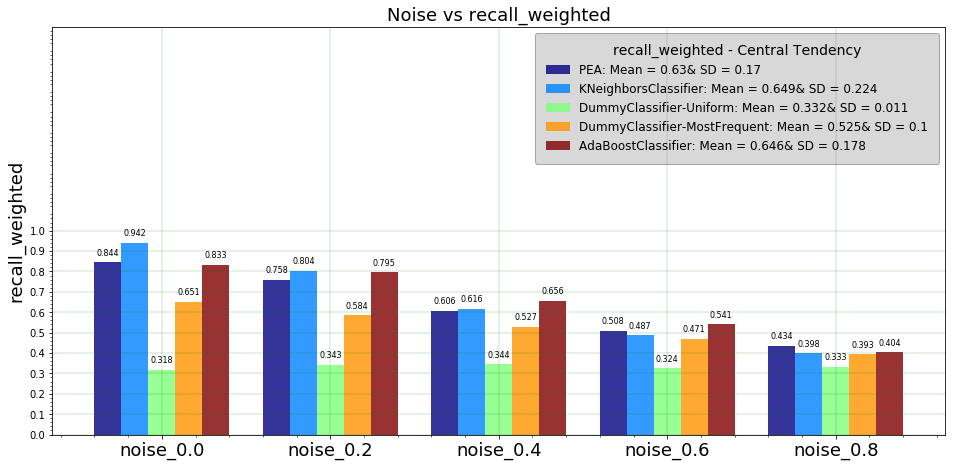

In [16]:
create_dict_clf_noise(classifier_list,'recall_weighted',5)

DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.812,0.854,0.340,0.333,0.879
noise_0.2,0.657,0.698,0.324,0.333,0.684
noise_0.4,0.564,0.551,0.334,0.333,0.487
noise_0.6,0.478,0.424,0.344,0.333,0.492
noise_0.8,0.384,0.352,0.340,0.333,0.401


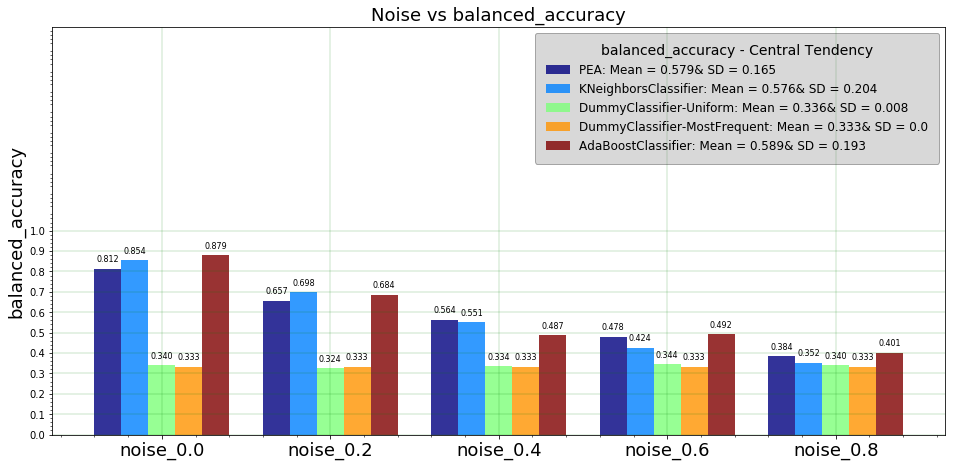

In [17]:
create_dict_clf_noise(classifier_list,'balanced_accuracy',5)

DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.793,0.970,0.337,0.647,0.875
noise_0.2,0.782,0.782,0.336,0.596,0.791
noise_0.4,0.663,0.632,0.340,0.531,0.668
noise_0.6,0.498,0.477,0.329,0.462,0.554
noise_0.8,0.415,0.387,0.328,0.396,0.431


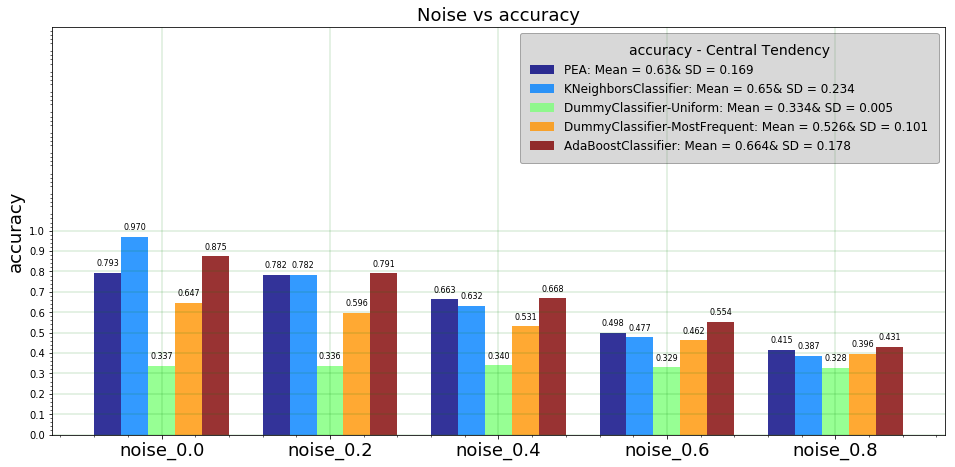

In [18]:
create_dict_clf_noise(classifier_list,'accuracy',5)

DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.708,0.848,0.499,0.5,0.779
noise_0.2,0.631,0.748,0.495,0.5,0.665
noise_0.4,0.585,0.631,0.504,0.5,0.615
noise_0.6,0.567,0.548,0.502,0.5,0.570
noise_0.8,0.521,0.503,0.499,0.5,0.513


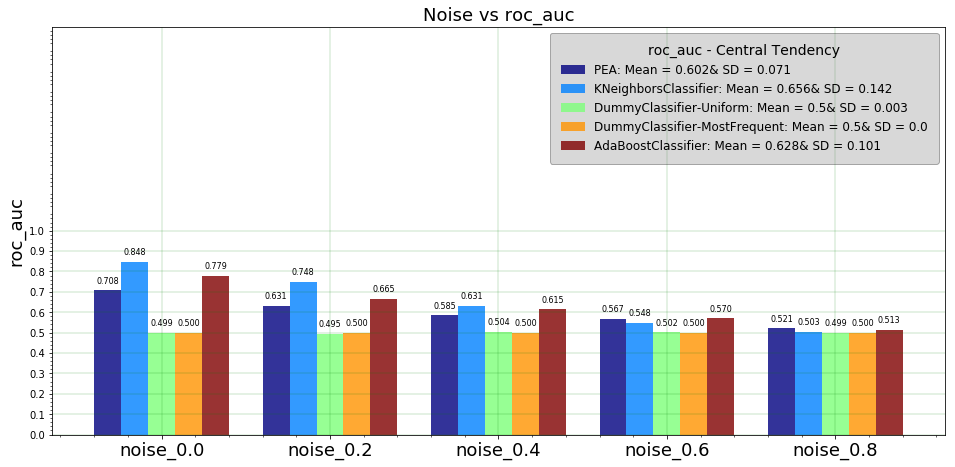

In [21]:
create_dict_clf_noise(classifier_list,'roc_auc',2) # ovr, weighted

sensitivity


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.824,0.995,0.331,1.0,0.954
noise_0.2,0.644,0.925,0.339,1.0,0.910
noise_0.4,0.753,0.828,0.358,1.0,0.824
noise_0.6,0.684,0.697,0.323,1.0,0.759
noise_0.8,0.501,0.555,0.335,1.0,0.616


1.0

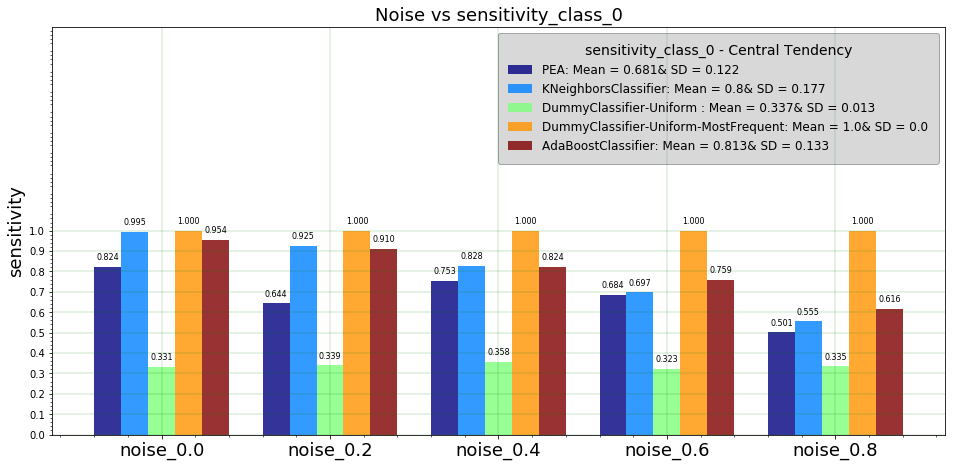

In [22]:
create_dict_clf_noise_classwise(classifier_list, 'sensitivity', '0', 5)

sensitivity


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.140,0.140,0.340,0.0,0.160
noise_0.2,0.000,0.041,0.316,0.0,0.013
noise_0.4,0.083,0.051,0.327,0.0,0.013
noise_0.6,0.202,0.112,0.340,0.0,0.033
noise_0.8,0.175,0.163,0.340,0.0,0.089


0.0

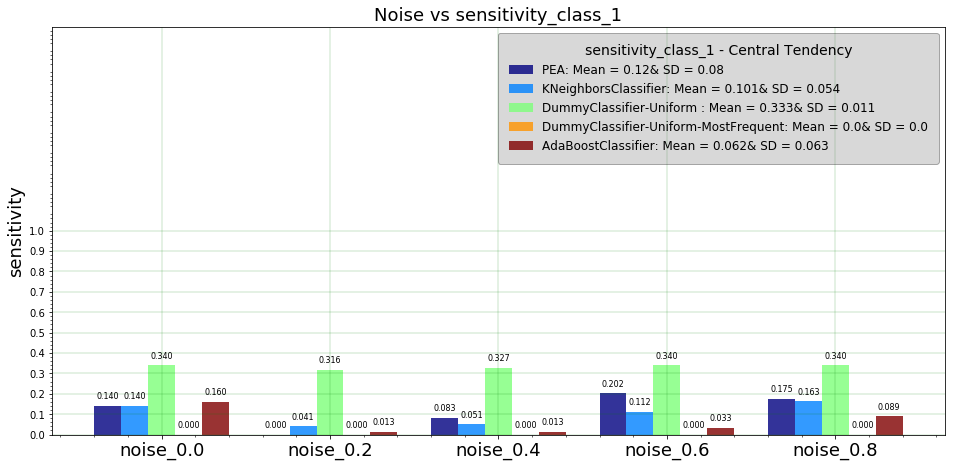

In [23]:
create_dict_clf_noise_classwise(classifier_list, 'sensitivity', '1', 5)

sensitivity


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.826,0.938,0.348,0.0,0.740
noise_0.2,0.634,0.733,0.315,0.0,0.768
noise_0.4,0.540,0.586,0.332,0.0,0.605
noise_0.6,0.431,0.397,0.343,0.0,0.491
noise_0.8,0.377,0.272,0.340,0.0,0.396


0.0

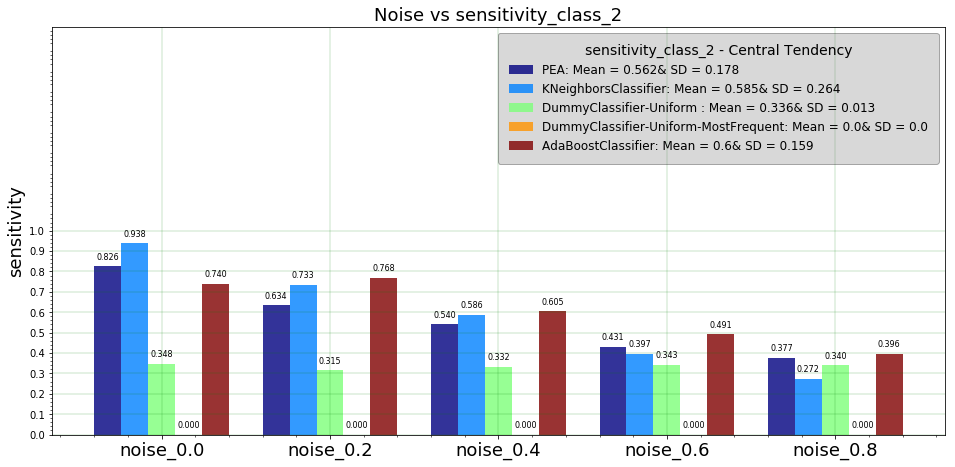

In [24]:
create_dict_clf_noise_classwise(classifier_list, 'sensitivity', '2', 5)

specificity


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.800,0.910,0.693,0.0,0.786
noise_0.2,0.662,0.655,0.679,0.0,0.682
noise_0.4,0.583,0.529,0.649,0.0,0.531
noise_0.6,0.549,0.463,0.675,0.0,0.493
noise_0.8,0.658,0.476,0.687,0.0,0.499


0.0

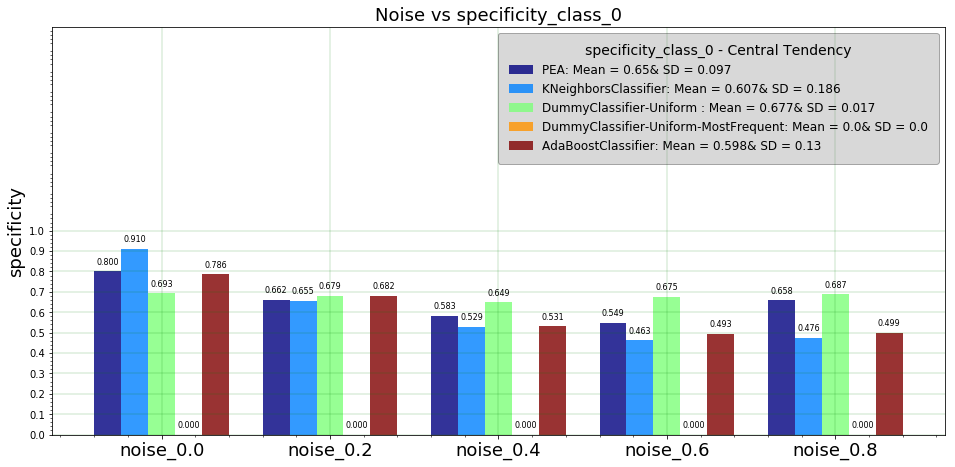

In [25]:
create_dict_clf_noise_classwise(classifier_list, 'specificity', '0', 5)

specificity


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.921,1.000,0.664,1.0,0.996
noise_0.2,0.955,0.986,0.662,1.0,0.998
noise_0.4,0.912,0.947,0.657,1.0,0.990
noise_0.6,0.875,0.898,0.666,1.0,0.977
noise_0.8,0.761,0.802,0.660,1.0,0.936


1.0

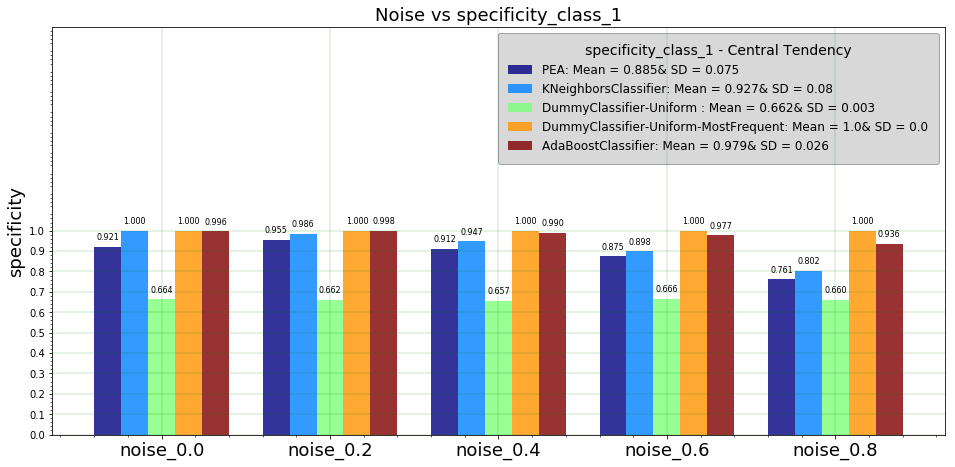

In [26]:
create_dict_clf_noise_classwise(classifier_list, 'specificity', '1', 5)

specificity


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.722,0.979,0.662,1.0,0.839
noise_0.2,0.758,0.934,0.667,1.0,0.866
noise_0.4,0.809,0.842,0.670,1.0,0.830
noise_0.6,0.661,0.777,0.668,1.0,0.753
noise_0.8,0.637,0.760,0.668,1.0,0.705


1.0

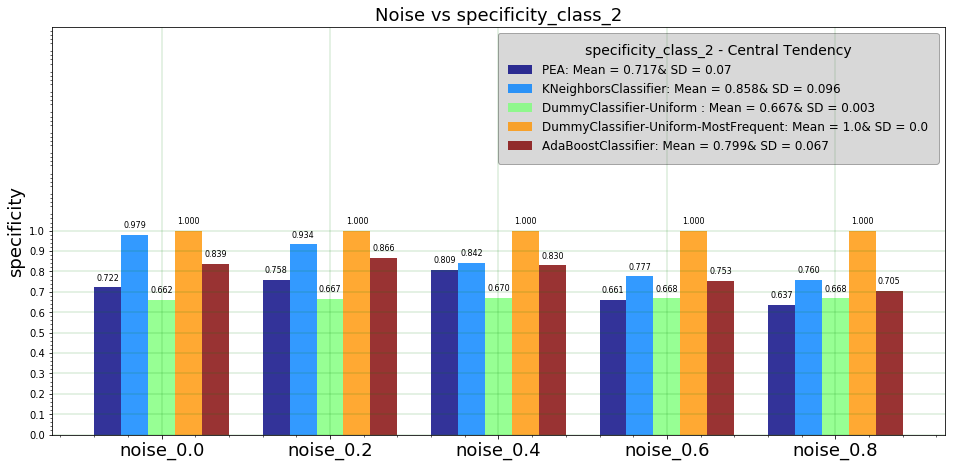

In [27]:
create_dict_clf_noise_classwise(classifier_list, 'specificity', '2', 5)

fpr


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.231,0.050,0.334,1.0,0.227
noise_0.2,0.351,0.322,0.331,1.0,0.334
noise_0.4,0.388,0.448,0.334,1.0,0.415
noise_0.6,0.412,0.531,0.325,1.0,0.518
noise_0.8,0.412,0.560,0.348,1.0,0.527


1.0

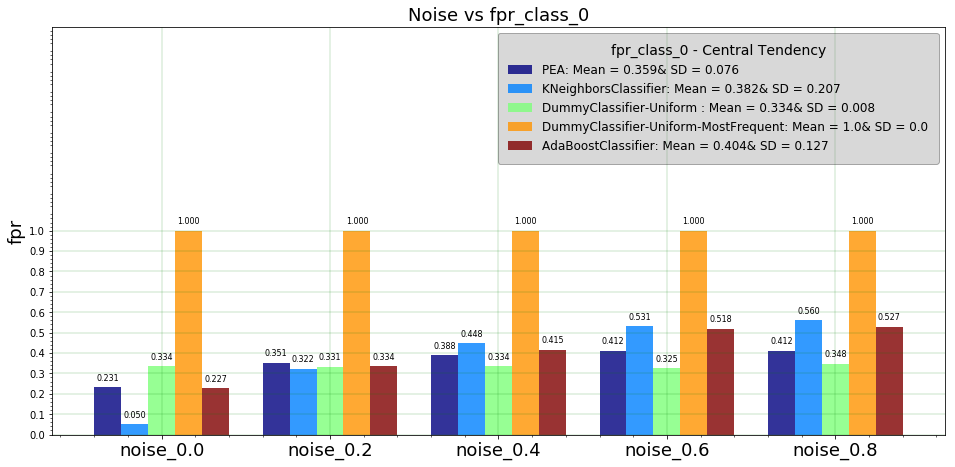

In [28]:
create_dict_clf_noise_classwise(classifier_list, 'fpr', '0', 5)

fpr


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.017,0.000,0.338,0.0,0.004
noise_0.2,0.031,0.012,0.337,0.0,0.004
noise_0.4,0.064,0.049,0.323,0.0,0.008
noise_0.6,0.096,0.104,0.330,0.0,0.015
noise_0.8,0.258,0.203,0.347,0.0,0.100


0.0

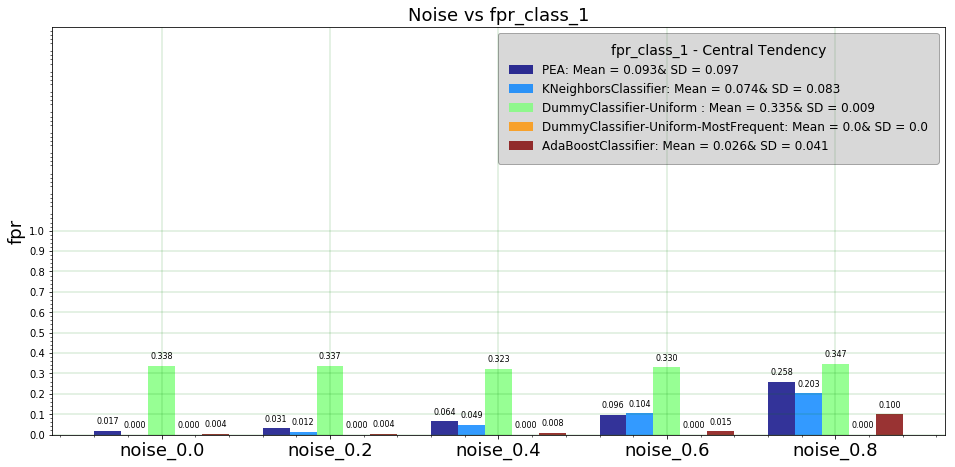

In [29]:
create_dict_clf_noise_classwise(classifier_list, 'fpr', '1', 5)

fpr


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.140,0.020,0.318,0.0,0.158
noise_0.2,0.179,0.101,0.323,0.0,0.094
noise_0.4,0.182,0.146,0.324,0.0,0.215
noise_0.6,0.289,0.240,0.327,0.0,0.247
noise_0.8,0.305,0.273,0.330,0.0,0.291


0.0

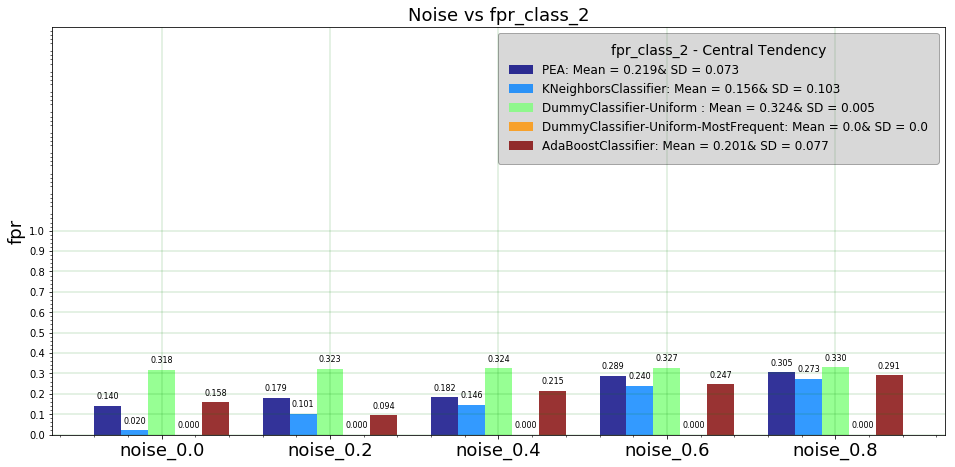

In [30]:
create_dict_clf_noise_classwise(classifier_list, 'fpr', '2', 5)

fnr


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.155,0.007,0.676,0.0,0.119
noise_0.2,0.177,0.069,0.674,0.0,0.104
noise_0.4,0.357,0.181,0.669,0.0,0.153
noise_0.6,0.294,0.302,0.664,0.0,0.230
noise_0.8,0.584,0.391,0.693,0.0,0.356


0.0

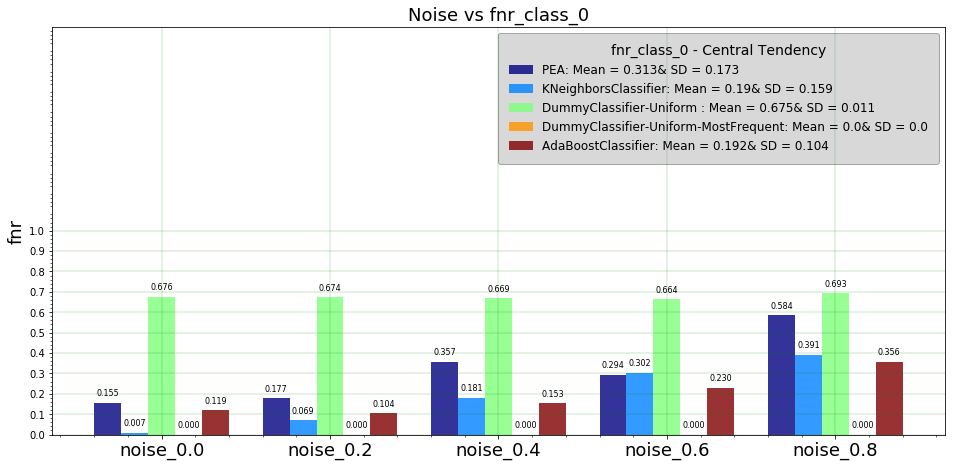

In [31]:
create_dict_clf_noise_classwise(classifier_list, 'fnr', '0', 5)

fnr


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.980,0.940,0.580,1.0,0.860
noise_0.2,0.933,0.960,0.696,1.0,0.982
noise_0.4,0.944,0.911,0.645,1.0,0.993
noise_0.6,0.946,0.899,0.652,1.0,0.987
noise_0.8,0.759,0.821,0.690,1.0,0.911


1.0

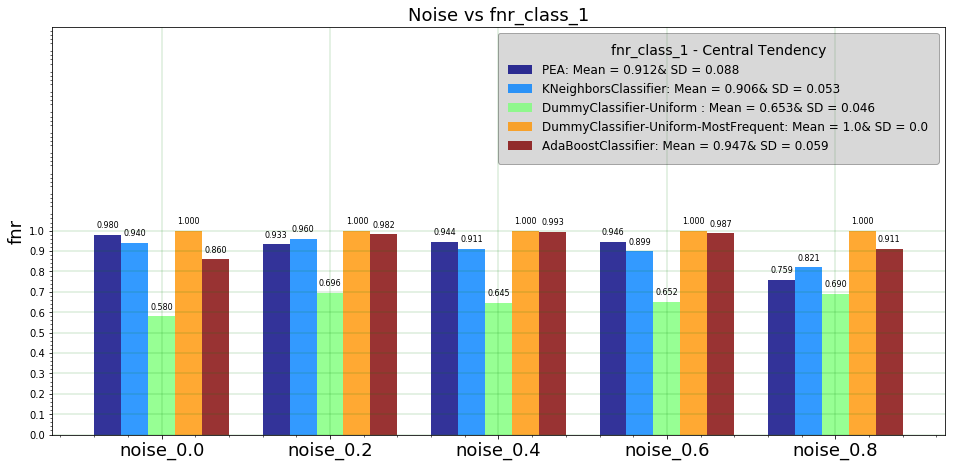

In [32]:
create_dict_clf_noise_classwise(classifier_list, 'fnr', '1', 5)

fnr


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.308,0.092,0.645,1.0,0.228
noise_0.2,0.198,0.218,0.653,1.0,0.306
noise_0.4,0.355,0.426,0.662,1.0,0.393
noise_0.6,0.496,0.597,0.657,1.0,0.461
noise_0.8,0.624,0.692,0.674,1.0,0.607


1.0

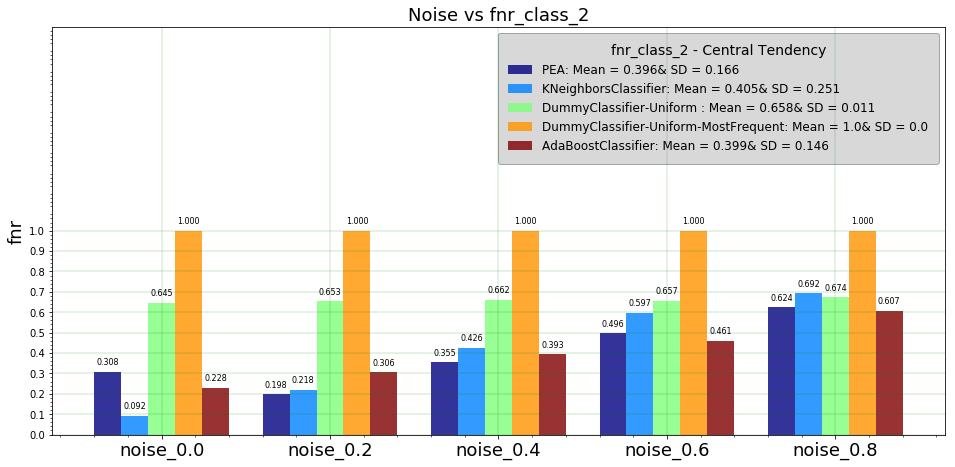

In [33]:
create_dict_clf_noise_classwise(classifier_list, 'fnr', '2', 5)

roc_auc_metric


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.731,0.964,0.498,0.5,0.745
noise_0.2,0.649,0.827,0.505,0.5,0.749
noise_0.4,0.656,0.691,0.511,0.5,0.662
noise_0.6,0.555,0.586,0.508,0.5,0.589
noise_0.8,0.576,0.526,0.497,0.5,0.541


0.5

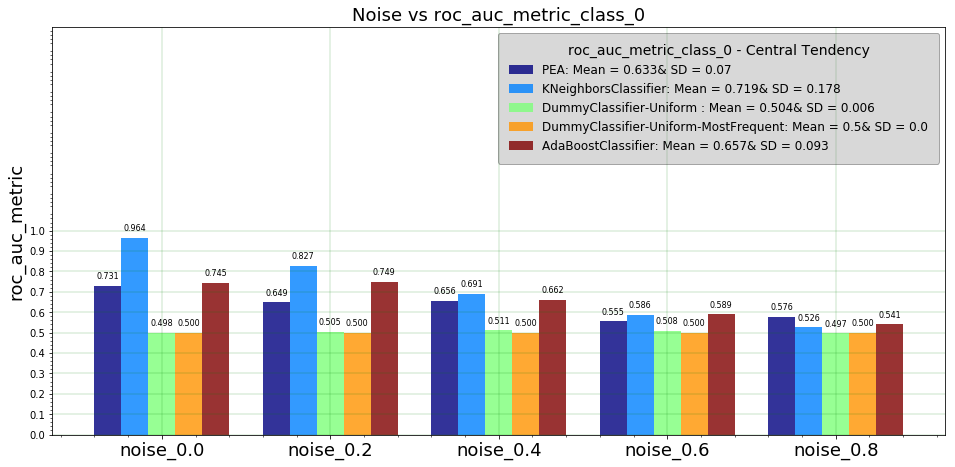

In [34]:
create_dict_clf_noise_classwise(classifier_list, 'roc_auc_metric', '0', 5)

roc_auc_metric


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.517,0.500,0.479,0.5,0.526
noise_0.2,0.496,0.509,0.506,0.5,0.502
noise_0.4,0.493,0.497,0.500,0.5,0.503
noise_0.6,0.491,0.497,0.499,0.5,0.498
noise_0.8,0.496,0.516,0.500,0.5,0.499


0.5

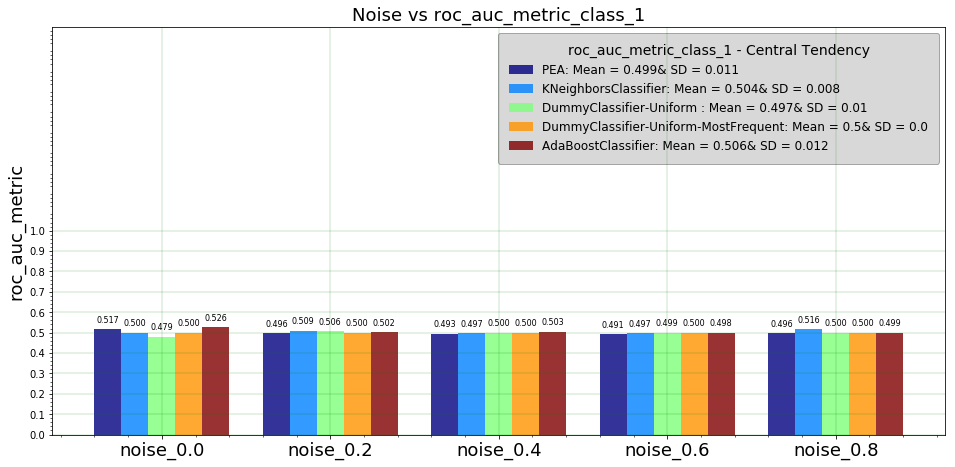

In [35]:
create_dict_clf_noise_classwise(classifier_list, 'roc_auc_metric', '1', 5)

roc_auc_metric


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.744,0.963,0.503,0.5,0.742
noise_0.2,0.737,0.846,0.505,0.5,0.827
noise_0.4,0.646,0.723,0.504,0.5,0.714
noise_0.6,0.603,0.597,0.496,0.5,0.636
noise_0.8,0.544,0.515,0.498,0.5,0.552


0.5

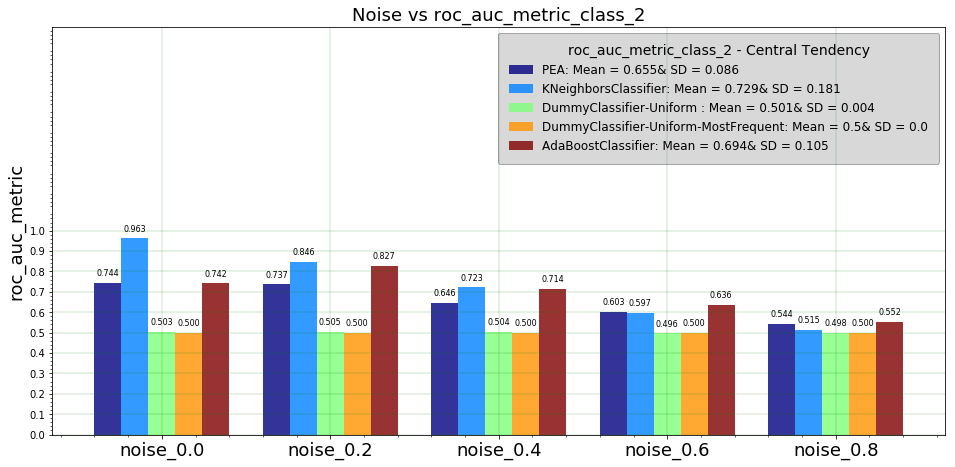

In [36]:
create_dict_clf_noise_classwise(classifier_list, 'roc_auc_metric', '2', 5)

precision_recall


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.867,0.977,0.710,0.825,0.936
noise_0.2,0.809,0.882,0.663,0.796,0.842
noise_0.4,0.756,0.777,0.599,0.760,0.792
noise_0.6,0.637,0.693,0.555,0.732,0.714
noise_0.8,0.542,0.576,0.474,0.700,0.612


0.7626000000000002

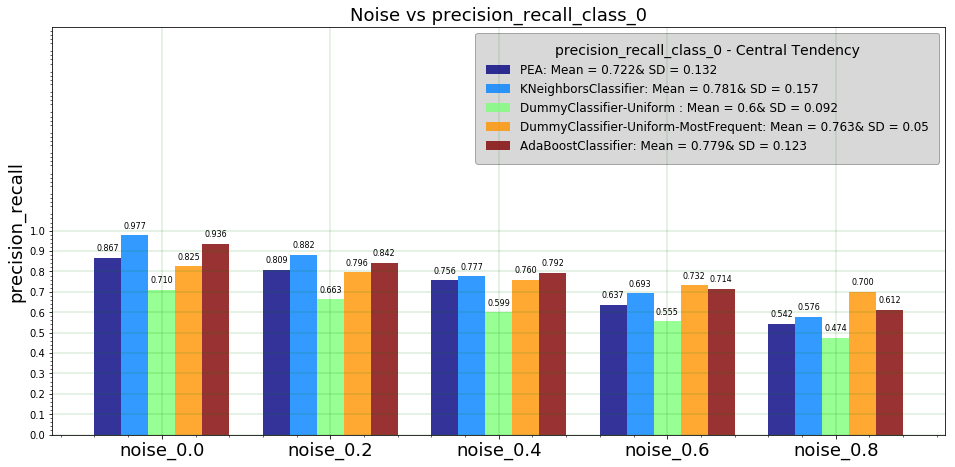

In [37]:
create_dict_clf_noise_classwise(classifier_list, 'precision_recall', '0', 5)

precision_recall


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.328,0.505,0.158,0.505,0.514
noise_0.2,0.287,0.073,0.205,0.536,0.176
noise_0.4,0.257,0.147,0.269,0.566,0.162
noise_0.6,0.341,0.257,0.337,0.601,0.208
noise_0.8,0.316,0.340,0.387,0.633,0.291


0.5681999999999999

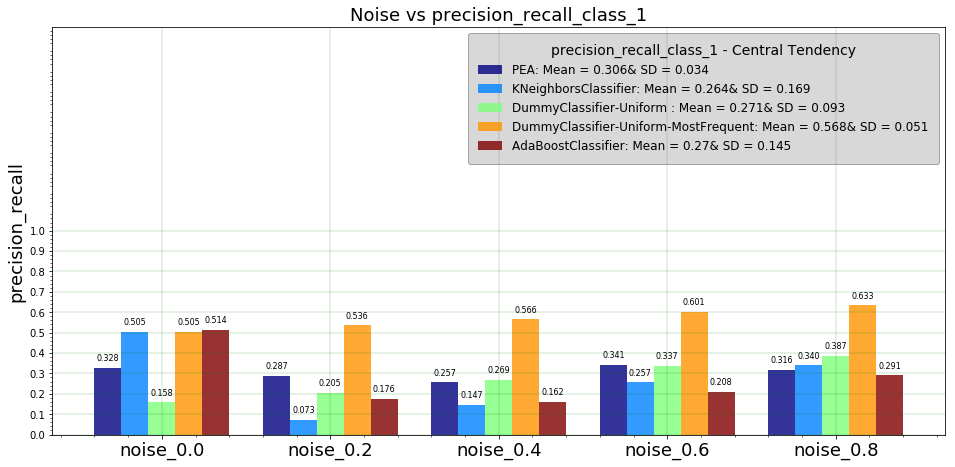

In [38]:
create_dict_clf_noise_classwise(classifier_list, 'precision_recall', '1', 5)

precision_recall


DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

,PEA,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent,AdaBoostClassifier
noise_0.0,0.659,0.947,0.450,0.670,0.838
noise_0.2,0.625,0.827,0.468,0.668,0.782
noise_0.4,0.603,0.682,0.466,0.670,0.671
noise_0.6,0.517,0.552,0.445,0.672,0.591
noise_0.8,0.522,0.428,0.450,0.668,0.485


0.6696000000000001

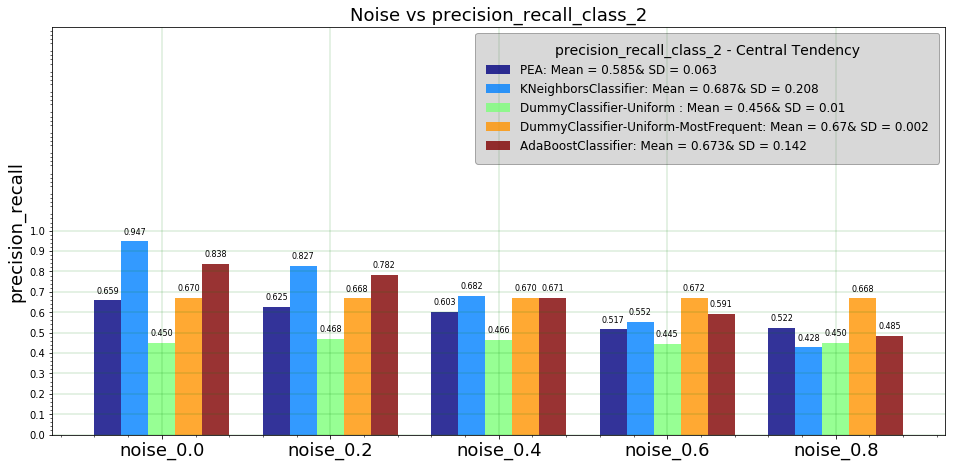

In [39]:
create_dict_clf_noise_classwise(classifier_list, 'precision_recall', '2', 5)

DummyClassifier(strategy='uniform')

DummyClassifier(strategy='most_frequent')

Index(['KNeighborsClassifier', 'DummyClassifier_uniform',
       'DummyClassifier_most_frequent'],
      dtype='object')

<Figure size 1152x576 with 0 Axes>

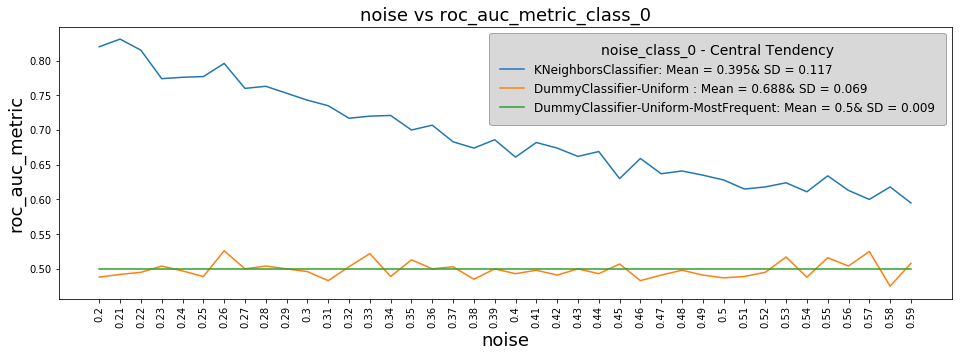

Index(['KNeighborsClassifier', 'DummyClassifier_uniform',
       'DummyClassifier_most_frequent'],
      dtype='object')

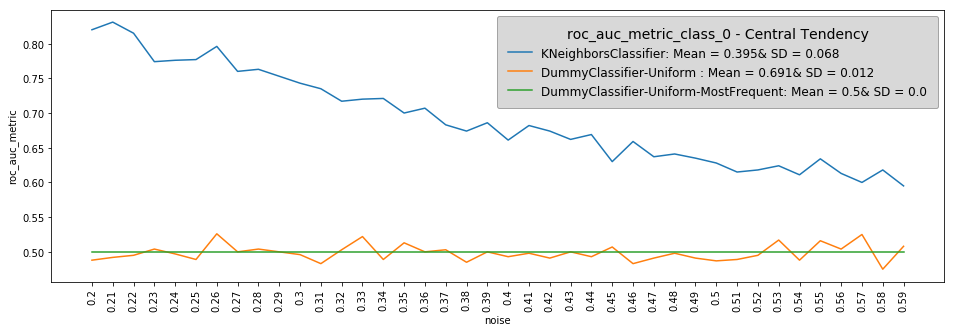

In [358]:
# df_2 = df_1.copy()
# df_2.reset_index(inplace=True)
# #display(str(df_1.reset_index()['index']).split('_'))
# df_2['noise'] = df_2['index'].str.lstrip('noise_')
# df_2.drop(columns=['index'], inplace=True)
# df_2.set_index('noise',inplace=True)
df_1

,KNeighborsClassifier,DummyClassifier_uniform,DummyClassifier_most_frequent
noise,,,
0.20,0.820,0.488,0.5
0.21,0.831,0.492,0.5
0.22,0.815,0.495,0.5
0.23,0.774,0.504,0.5
0.24,0.776,0.497,0.5
0.25,0.777,0.489,0.5
0.26,0.796,0.526,0.5
0.27,0.760,0.500,0.5
0.28,0.763,0.504,0.5


In [220]:
df_1.reset_index()
df_long = pd.melt(df_1.reset_index(), id_vars="index", var_name="method", value_name="score")
display(df_long)
alt.Chart(df_long).mark_line().encode(
    x='index',
    y='score',
    color='method:N'
).interactive()

# base = alt.Chart(df_1.reset_index()).encode(x='index')

# alt.layer(
#     base.mark_line(color='blue', point=True).encode(y='KNeighborsClassifier'),
#     base.mark_line(color='red', point=True).encode(y='DummyClassifier_uniform'),
#     base.mark_line(color='aqua', point=True).encode(y='DummyClassifier_most_frequent')
# )

,index,method,score
0,noise_0.2,PEA,0.671
1,noise_0.21,PEA,0.697
2,noise_0.22,PEA,0.672
3,noise_0.23,PEA,0.701
4,noise_0.24,PEA,0.664
...,...,...,...
195,noise_0.55,DecisionTreeClassifier,0.609
196,noise_0.56,DecisionTreeClassifier,0.616
197,noise_0.57,DecisionTreeClassifier,0.615
198,noise_0.58,DecisionTreeClassifier,0.612


alt.Chart(...)

In [216]:
clf_list = [
     #PerformanceEnrichmentAnalysisClassifier(
     #   number_of_clusters=20, permutations=100),
     KNeighborsClassifier(3),
     DummyClassifier(strategy='uniform'),
     DummyClassifier(strategy='most_frequent'),
     # SVC(kernel="linear", C=0.025),
     # SVC(gamma=2, C=1),
     # DecisionTreeClassifier(max_depth=5),
     # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
     # MLPClassifier(alpha=0.01),
     # AdaBoostClassifier(),
     #GaussianNB(),
     # QuadraticDiscriminantAnalysis()
]